#  Task 1
## Statement

$$
\frac{k}{\mu B}\Delta_x p(t, x) = \frac{V_b \phi c }{\alpha}\frac{\partial}{\partial t}p(t, x)\\
\frac{\partial}{\partial x}\big(\frac{k_x A_x}{\mu B} \frac{\partial p}{\partial x}\big) 
+ q
=\frac{V_b \phi c }{\alpha}\frac{\partial p}{\partial t}
$$

$$ \frac{\partial }{\partial t} p= \frac{1}{\alpha} \Delta p\\
p(x, 0) = p_0,\ p(0, t)=p_1,\ p(L, t) = p_2
$$


<img src="figures/Task1.png">

## Numerical solution
$$\frac{1}{\mu B}\Big(\frac{k_{-\frac{1}{2}} A_{-\frac{1}{2}}}{\Delta x_{-\frac{1}{2}}}p_{-1}
- \big( \frac{k_{\frac{1}{2}} A_{\frac{1}{2}}}{\Delta x_{\frac{1}{2}}} + \frac{k_{-\frac{1}{2}} A_{-\frac{1}{2}}}{\Delta x_{-\frac{1}{2}}}\big)p_{0}
+\frac{k_{\frac{1}{2}} A_{\frac{1}{2}}}{\Delta x_{\frac{1}{2}}}p_{1}\Big) + q_0
= \frac{p^{n+1}_0 - p^{n}_0}{\Delta t} \frac{V_b \phi c}{\alpha}
$$
$\tilde{q}_0 = q_0 + \frac{1}{\mu B}\frac{k_{-\frac{1}{2}} A_{-\frac{1}{2}}}{\Delta x_{-\frac{1}{2}}}p_{-1}$, где $p_{-1}$ 

## Analitical solution

$$
p(x, t) = \frac{p_2 - p_1}{L}x + p_1 + \sum_{k=1}^{\inf}-2\frac{e^{-\frac{\pi^2 t k^2}{L^2 \alpha}}\Big(p_1 + (-1)^{k+1}p_2 + \big(-1 + (-1)^{k}\big)p_0\Big)\sin(\frac{\pi x k}{L})}{\pi k}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [2]:
k = 1e-1 * 1.987e-13  # 1 darcy to m^2
dx = 1 # m
dy = 5 # m
c = 15.8e-10 # # Pa^-1
phi = 0.4
B = 1
mu = 2.9e-4  # m^2 / s
p_0 = 4e4 * 6894  # psi to Pa
p_1 = 4.1e4 * 6894  # psi to Pa
p_2 = 3.9e4 * 6894  # psi to Pa
nx = 15
d = 3  # m
dt = 1  # s

In [3]:
lapl = np.zeros((nx, nx))
for dia in range(nx):
    lapl[dia, dia] = -2 * k * d * dy / dx
    if dia-1 >= 0:
        lapl[dia, dia-1] = k * d * dy / dx
    if dia+1 < nx:
        lapl[dia, dia+1] = k * d * dy / dx
lapl *= 1 / (mu * B)

In [4]:
q_tilde = np.zeros((nx, 1))
q_tilde[0] = 1 / (mu * B) * k * dy * d / dx * p_1
q_tilde[nx-1] = 1 / (mu * B) * k * dy * d / dx * p_2

In [5]:
dt_coeff = dx * dy * d * phi * c / dt

In [6]:
alpha_analit = mu * B * phi * c / k
alpha_analit

9.223955712128838

In [7]:
def accurate_solution(x, t, alpha, L, p_0, p_1, p_2, n=1000):
    out = p_1 + (p_2 - p_1) * x / L
    for k in range(1, n+1):
        adj = -2. * np.exp((-1. * np.pi * np.pi * t * k * k) / (L * L * alpha))
        adj *= (p_1 - (-1.)**k * p_2 + (-1. + (-1.)**k)*p_0)
        adj *= np.sin(np.pi * x * k / L)
        adj /= np.pi
        adj /= k
        out += adj
    return out

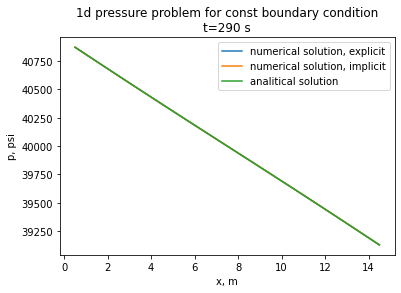

In [8]:
n_iter = int(3e2)
p_ex = np.ones((nx, 1)) * p_0
p_im = np.ones((nx, 1)) * p_0
t = 0
xs = list((np.linspace(0, nx-1, nx) + dx/2) * dx)
plot_freq = int(1e1)
for i in range(1, n_iter):
    p_ex += 1 / dt_coeff * (lapl.dot(p_ex) + q_tilde)
    p_im += 1 / dt_coeff * (q_tilde)
    p_im = np.linalg.inv(np.eye(nx) - 1 / dt_coeff * lapl).dot(p_im)
    t += dt
    if i % plot_freq == 0:
        p_analit = [accurate_solution(x + dx / 2, t, alpha_analit, (nx+1)*dx, p_0, p_1, p_2) / 6894. for x in xs]
        display.clear_output(wait=True)
        plt.plot(xs, p_ex / 6894, label=f'numerical solution, explicit')
        plt.plot(xs, p_im / 6894, label=f'numerical solution, implicit')
        plt.plot(xs, p_analit, label=f'analitical solution')
        plt.xlabel('x, m')
        plt.ylabel('p, psi')
        plt.title(f'1d pressure problem for const boundary condition\nt={t} s')
        plt.legend()
        plt.show()